In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

# 3.1

In [4]:
sql1= """
    select * from gp5.student
    """

In [5]:
df=pandas.read_sql_query(sql1,conn)
df[:]

,student_email,student_name,major
0,tomlinen@dukes.jmu.edu,Elijah Tomlin,IA
1,s2@dukes.jmu.edu,student2,IA
2,s3@dukes.jmu.edu,student3,IA
3,s1@dukes.jmu.edu,student1,IA


# 3.2

In [6]:
sql2 = """
        select gp5.professor.name,
        gp5.course.course_name
        from gp5.professor
        inner join gp5.course
        on gp5.professor.email = gp5.course.email
        """

In [7]:
df=pandas.read_sql_query(sql2,conn)
df[:]

,name,course_name
0,Xuebin Wei,data mining
1,Noel Hendrickson,Counterfactual Reasoning
2,Steven Cresawn,Intro to Data Analytics
3,Kathleen Moore,Tech Apps
4,Kathleen Moore,Seminar on Issues in IA


# 3.3

In [8]:
sql3 = """
        select course_number,
        count(course_number) as num_enroll
        from gp5.enroll_list
        group by course_number
        """

In [9]:
df=pandas.read_sql_query(sql3,conn)
df[:]

,course_number,num_enroll
0,DATA200,3
1,IA340,3
2,IA300,3
3,IA313,3


<AxesSubplot:xlabel='course_number'>

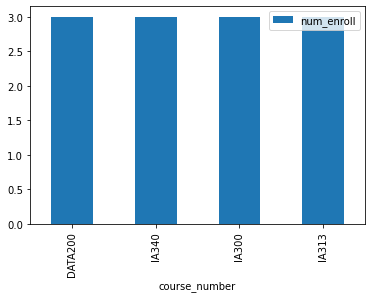

In [10]:
df.plot.bar(x='course_number',y='num_enroll')

# 3.4

In [14]:
sql4 = """
        select gp5.professor.name,
        count(gp5.course.course_name) as num_course
        from gp5.professor
        inner join gp5.course
        on gp5.professor.email = gp5.course.email
        group by gp5.professor.name
        """

In [15]:
df=pandas.read_sql_query(sql4,conn)
df[:]

,name,num_course
0,Noel Hendrickson,1
1,Xuebin Wei,1
2,Steven Cresawn,1
3,Kathleen Moore,2


In [13]:
conn.rollback()

# 3.5

In [16]:
sql5 = """
            insert into gp5.professor(email,name,office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(sql5)


            insert into gp5.professor(email,name,office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [17]:
cur.execute(sql5)

In [18]:
conn.commit()

In [19]:
df=pandas.read_sql_query('select * from gp5.professor',conn)
df[:]

,email,name,office
0,weixx@jmu.edu,Xuebin Wei,HHS112
1,waltomtr@jmu.edu,Timothy Walton,ISAT326
2,cresawsg@jmu.edu,Steven Cresawn,BIO3028E
3,hendrinx@jmu.edu,Noel Hendrickson,ENGEO3103
4,moore8ka@jmu.edu,Kathleen Moore,ISAT100
5,new_lab4_email,new_p_lab4_name,new_lab4_o


In [20]:
sql52 = """
            insert into gp5.course(course_number,course_name,room,email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(sql52)


            insert into gp5.course(course_number,course_name,room,email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [21]:
cur.execute(sql52)

In [22]:
conn.commit()

In [23]:
df=pandas.read_sql_query('select * from gp5.course',conn)
df[:]

,course_number,course_name,room,email
0,IA340,data mining,ISAT 336,weixx@jmu.edu
1,IA313,Counterfactual Reasoning,ENGEO1204,hendrinx@jmu.edu
2,DATA200,Intro to Data Analytics,BIO2009,cresawsg@jmu.edu
3,IA240,Tech Apps,Online,moore8ka@jmu.edu
4,IA300,Seminar on Issues in IA,ISAT150,moore8ka@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


# 3.6

In [24]:
sql6 ="""
                    update gp5.course
                    set email = '{}'
                    where email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [25]:
cur.execute(sql6)

In [26]:
conn.commit()

In [27]:
df=pandas.read_sql_query('select * from gp5.course',conn)
df[:]

,course_number,course_name,room,email
0,IA340,data mining,ISAT 336,weixx@jmu.edu
1,IA313,Counterfactual Reasoning,ENGEO1204,hendrinx@jmu.edu
2,DATA200,Intro to Data Analytics,BIO2009,cresawsg@jmu.edu
3,IA240,Tech Apps,Online,moore8ka@jmu.edu
4,IA300,Seminar on Issues in IA,ISAT150,moore8ka@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [28]:
q6_delete_professor_sql = """
                            delete from gp5.professor
                            where email='{}'
                            """.format('t2@jmu.edu')

In [29]:
cur.execute(q6_delete_professor_sql)

In [30]:
conn.commit()

In [31]:
df=pandas.read_sql_query('select * from gp5.professor',conn)
df[:]

,email,name,office
0,weixx@jmu.edu,Xuebin Wei,HHS112
1,waltomtr@jmu.edu,Timothy Walton,ISAT326
2,cresawsg@jmu.edu,Steven Cresawn,BIO3028E
3,hendrinx@jmu.edu,Noel Hendrickson,ENGEO3103
4,moore8ka@jmu.edu,Kathleen Moore,ISAT100
5,new_lab4_email,new_p_lab4_name,new_lab4_o


In [32]:
cur.close()

In [33]:
conn.close()